### Configuration

In [1]:
!pip install retina-face

In [22]:
!pip install deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.6 MB/s eta 0:00:00


### Face Detection & Extraction

Using Retina-Face
https://github.com/serengil/retinaface



> Kenapa pakai ini? Karena ini yg paling akurat utk saat ini & bs mengabaikan noise dgn baik



In [2]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import cv2
import os

In [36]:
output_folder = '/content/output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Folder '{output_folder}' berhasil dibuat.")

In [37]:
img = '/content/IMG_1772.JPG'

faces = RetinaFace.extract_faces(img_path = img, align = True)
print(f"Ditemukan {len(faces)} wajah.")


Ditemukan 13 wajah.


In [38]:
for i, face in enumerate(faces):
        output_filename = os.path.join(output_folder, f"wajah_{i+1}.jpg")

        face_bgr = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)

        cv2.imwrite(output_filename, face_bgr)

        print(f"Wajah #{i+1} berhasil disimpan di: {output_filename}")

Wajah #1 berhasil disimpan di: /content/output/wajah_1.jpg
Wajah #2 berhasil disimpan di: /content/output/wajah_2.jpg
Wajah #3 berhasil disimpan di: /content/output/wajah_3.jpg
Wajah #4 berhasil disimpan di: /content/output/wajah_4.jpg
Wajah #5 berhasil disimpan di: /content/output/wajah_5.jpg
Wajah #6 berhasil disimpan di: /content/output/wajah_6.jpg
Wajah #7 berhasil disimpan di: /content/output/wajah_7.jpg
Wajah #8 berhasil disimpan di: /content/output/wajah_8.jpg
Wajah #9 berhasil disimpan di: /content/output/wajah_9.jpg
Wajah #10 berhasil disimpan di: /content/output/wajah_10.jpg
Wajah #11 berhasil disimpan di: /content/output/wajah_11.jpg
Wajah #12 berhasil disimpan di: /content/output/wajah_12.jpg
Wajah #13 berhasil disimpan di: /content/output/wajah_13.jpg


### Face Finding

In [39]:
from deepface import DeepFace

In [61]:
img = '/content/novi.JPG'

In [62]:
import tempfile

models = [
    "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace",
    "DeepID", "ArcFace", "Dlib", "SFace", "GhostFaceNet",
    "Buffalo_L",
]

# Create a temporary directory to save extracted faces
with tempfile.TemporaryDirectory() as tmpdir:
    for i, face in enumerate(faces):
        # Save the extracted face to a temporary file
        temp_face_path = os.path.join(tmpdir, f"temp_face_{i+1}.jpg")
        face_bgr = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
        cv2.imwrite(temp_face_path, face_bgr)

        try:
            # Use the temporary file path in DeepFace.verify
            result = DeepFace.verify(
                img1_path = img, img2_path = temp_face_path, model_name = 'ArcFace', enforce_detection=False
            )
            print(f"img vs wajah_{i+1} (file sementara): {result['verified']}")
        except Exception as e:
            print(f"Error verifying img vs wajah_{i+1} (file sementara): {e}")

img vs wajah_1 (file sementara): False
img vs wajah_2 (file sementara): True
img vs wajah_3 (file sementara): True
img vs wajah_4 (file sementara): False
img vs wajah_5 (file sementara): False
img vs wajah_6 (file sementara): True
img vs wajah_7 (file sementara): True
img vs wajah_8 (file sementara): False
img vs wajah_9 (file sementara): False
img vs wajah_10 (file sementara): False
img vs wajah_11 (file sementara): False
img vs wajah_12 (file sementara): False
img vs wajah_13 (file sementara): False


In [64]:
# Analyze the verification results

print("\nRingkasan Hasil Pencocokan:")
match_results = []
found_matches = False
for i, face in enumerate(faces):
    try:
        # We need to save the face to a temporary file again to verify
        with tempfile.TemporaryDirectory() as tmpdir:
            temp_face_path = os.path.join(tmpdir, f"temp_face_{i+1}.jpg")
            face_bgr = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
            cv2.imwrite(temp_face_path, face_bgr)

            result = DeepFace.verify(
                img1_path = img, img2_path = temp_face_path, model_name = 'ArcFace', enforce_detection=False
            )
            # Check if result is a dictionary and contains the 'verified' key
            if isinstance(result, dict) and 'verified' in result and result['verified']:
                print(f"-> Wajah #{i+1} di gambar database cocok dengan foto query (Jarak: {result.get('distance', 'N/A'):.4f}, Keyakinan: {result.get('confidence', 'N/A'):.2f})")
                match_results.append({
                # Kamu mungkin perlu menyimpan path gambar asli, bukan hasil deteksi
                "face_index": i+1,
                "distance": result.get('distance', 1.0),
                "confidence": result.get('confidence', 0.0) # Tambahkan confidence untuk sorting
            })
                found_matches = True
    except Exception as e:
         print(f"-> Gagal memverifikasi wajah #{i+1} untuk analisis hasil: {e}")


if not found_matches:
    print("Tidak ada wajah yang cocok ditemukan di gambar database.")


Ringkasan Hasil Pencocokan:
-> Wajah #2 di gambar database cocok dengan foto query (Jarak: 0.6353, Keyakinan: 51.00)
-> Wajah #3 di gambar database cocok dengan foto query (Jarak: 0.5936, Keyakinan: 51.00)
-> Wajah #6 di gambar database cocok dengan foto query (Jarak: 0.6785, Keyakinan: 51.00)
-> Wajah #7 di gambar database cocok dengan foto query (Jarak: 0.2858, Keyakinan: 86.28)



Menampilkan gambar asli dan wajah yang paling cocok:


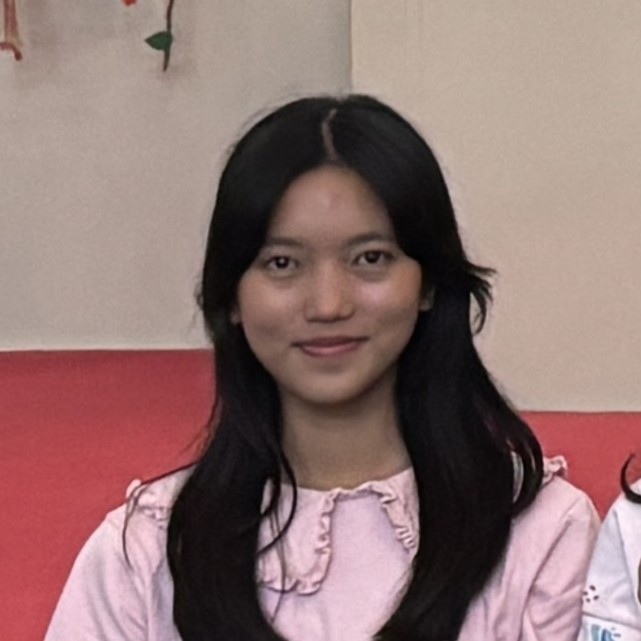

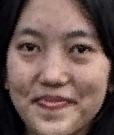

In [65]:
from google.colab.patches import cv2_imshow
import numpy as np # Import numpy for array handling

sorted_results = sorted(match_results, key=lambda item: item['confidence'])

if sorted_results:
    # Get the index of the best matching face
    best_match_index = sorted_results[-1]['face_index'] - 1 # Adjust index to be 0-based

    # Retrieve the image data for the best matching face
    # Ensure the index is valid for the 'faces' list
    if 0 <= best_match_index < len(faces):
        best_match_face_rgb = faces[best_match_index]
        best_match_face_bgr = cv2.cvtColor(best_match_face_rgb, cv2.COLOR_RGB2BGR)

        # Read the original image to display
        original_img_bgr = cv2.imread(img) # Assuming 'img' variable still holds the path to the original image

        if original_img_bgr is not None:
            print("\nMenampilkan gambar asli dan wajah yang paling cocok:")
            cv2_imshow(original_img_bgr)
            cv2_imshow(best_match_face_bgr)
        else:
            print(f"Gagal membaca gambar asli dari path: {img}")
    else:
        print(f"Indeks wajah terbaik ({best_match_index + 1}) di luar jangkauan daftar wajah yang diekstrak ({len(faces)}).")
else:
    print("Tidak ada hasil pencocokan yang ditemukan untuk ditampilkan.")